# Projeto ML classifier NLP noticiciario BBC news (Class Texto)


__Bussines Problem:__
> Nos dias atuais possuímos uma grande frequência de informações disponíveis em sites, jornais e mídias de comunicação, estar a par destas notícias pode nos gerar insights de tendências de mercado, o grande ponto é que como seres humanos possuímos limitações para absorção e leitura de muitas notícias, sendo necessário a automatização dessas tarefas com a implementação de algoritmos de inteligência artificial para NLP do inglês natural language processing para a leitura automatizada e posterior classificação de um grande volume de notícias.

__Objetivo:__   
> Desenvolver um modelo de machine learning para o processamento de NLP, para notícias extraídas do site bbc (British Broadcasting Corporation) e classificação das mesmas em classes denominadas, bussines, entertainment, politics, sport,tech

__Autor:__  
   - Bruno Priantti.

__Apoio:__
- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.
    
__Contato:__  
  - bpriantti@gmail.com

__Encontre-me:__  
   -  https://www.linkedin.com/in/bpriantti/  
   -  https://github.com/bpriantti
   -  https://www.instagram.com/brunopriantti/
   
__Frameworks Utilizados:__

- Numpy: https://numpy.org/doc/  
- Pandas: https://pandas.pydata.org/
- Matplotlib: https://matplotlib.org/ 
- Seaborn: https://seaborn.pydata.org/  
- Plotly: https://plotly.com/  
- Scikit learn: https://scikit-learn.org/stable/index.html
- Statsmodels: https://www.statsmodels.org/stable/index.html


# python codes:

____

imports:

In [6]:
# data wralling:
import numpy as np
import pandas as pd

# nlp stopwords:
from nltk.corpus import stopwords

# files
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer

# data split:
from sklearn.model_selection import train_test_split

# modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,VotingClassifier, StackingClassifier

# avaliar metricas:
from sklearn.metrics import accuracy_score

#---
import warnings
warnings.filterwarnings("ignore")

load data:

In [2]:
news = load_files('files', encoding = 'utf-8', decode_error = 'replace')

In [3]:
# Separando variáveis de entrada e saída
X = news.data
y = news.target

In [9]:
pd.DataFrame(X).head(20)

,0
0,Tate & Lyle boss bags top award\n\nTate & Lyle...
1,Halo 2 sells five million copies\n\nMicrosoft ...
2,MSPs hear renewed climate warning\n\nClimate c...
3,Pavey focuses on indoor success\n\nJo Pavey wi...
4,Tories reject rethink on axed MP\n\nSacked MP ...
5,Lib Dems predict 'best ever poll'\n\nThe Lib D...
6,Howard attacks 'pay later' Budget\n\nTory lead...
7,Games win for Blu-ray DVD format\n\nThe next-g...
8,Labour pig poster 'anti-Semitic'\n\nThe Labour...
9,Costin aims for comeback in 2006\n\nJamie Cost...


In [10]:
print(len(X))

2225


In [20]:
#import nltk
#nltk.download()
# Lista de stop words

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [21]:
my_stop_words = set(stopwords.words('english'))

In [25]:
# Divisão em treino e teste (70/30)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.30, random_state = 75)

# Vetorização
vectorizer = TfidfVectorizer(norm = None, stop_words = my_stop_words, max_features = 1000, decode_error = "ignore")

# Aplicamos a vetorização.
# Observe que treinamos e aplicamos em treino e apenas aplicamos em teste
X_treino_vectors = vectorizer.fit_transform(X_treino)
X_teste_vectors = vectorizer.transform(X_teste)

# Modelos:

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
mod1 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 30, max_iter = 1000)

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
mod2 = RandomForestClassifier(n_estimators = 1000, max_depth = 100, random_state = 1)

# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
mod3 = MultinomialNB()

# Lista para o resultado
resultado = []

# Iniciando o modelo de votação
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
# https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier
voting_model = VotingClassifier(estimators = [ ('lg', mod1), ('rf', mod2), ('nb', mod3) ], voting = 'soft')

print("\nModelo de Votação:\n")
print(voting_model)
    
# Treinamento
voting_model = voting_model.fit(X_treino_vectors, y_treino)
    
# Previsões com dados de teste
previsoes =  voting_model.predict(X_teste_vectors)

# Grava o resultado
resultado.append(accuracy_score(y_teste, previsoes))
    
# Print
print('\nAcurácia do Modelo:', accuracy_score(y_teste, previsoes),'\n')


Modelo de Votação:

VotingClassifier(estimators=[('lg',
                              LogisticRegression(max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=30)),
                             ('rf',
                              RandomForestClassifier(max_depth=100,
                                                     n_estimators=1000,
                                                     random_state=1)),
                             ('nb', MultinomialNB())],
                 voting='soft')

Acurácia do Modelo: 0.9625748502994012 






Confusion Matrix:  


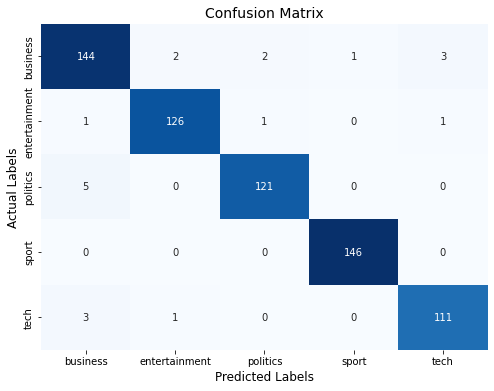


Classification Report:  
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       152
           1       0.98      0.98      0.98       129
           2       0.98      0.96      0.97       126
           3       0.99      1.00      1.00       146
           4       0.97      0.97      0.97       115

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



In [19]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the confusion matrix
confusion_matrix_data = confusion_matrix(y_teste, previsoes)

print('')
print('Confusion Matrix:  ')
# Plot the data
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(confusion_matrix_data, fmt="d",cmap='Blues', cbar=False, annot=True, ax=ax)

# Set the axes labels and the title
ax.set_xlabel('Predicted Labels', fontsize=12)
ax.set_ylabel('Actual Labels', fontsize=12)
ax.set_title('Confusion Matrix', fontsize=14)
ax.xaxis.set_ticklabels(['business','entertainment', 'politics', 'sport' ,'tech'])
ax.yaxis.set_ticklabels(['business','entertainment', 'politics','sport','tech'])

plt.show()

print('')
print('Classification Report:  ')
#Classification report
classification_report_data = classification_report(y_teste, previsoes)

# Print the classification reportf
print(classification_report_data)

In [11]:
# Para gravar o resultado
d = {}
d['soft'] = []
d['hard'] = []

# Loop
for x in range(1,100):

	# Div treino/teste
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.30, random_state = x)

    # Stop words
    my_stop_words = set(stopwords.words('english'))

    # Vet
    vectorizer = TfidfVectorizer(norm = None, stop_words = my_stop_words, max_features = 1000, decode_error = "ignore")

    # Aplica a vetorização
    X_treino_vectors = vectorizer.fit_transform(X_treino)
    X_teste_vectors = vectorizer.transform(X_teste)

    # Cria os modelos base
    modelo1 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state = 30, max_iter = 1000)
    modelo2 = RandomForestClassifier(n_estimators = 1000, max_depth = 100, random_state = 1)
    modelo3 = MultinomialNB()

    # Loop
    for i in ['soft','hard']:
        voting_model = VotingClassifier(estimators = [ ('lg', modelo1), ('rf', modelo2), ('nb', modelo3)], voting = i)
        voting_model = voting_model.fit(X_treino_vectors, y_treino)
        previsoes = voting_model.predict(X_teste_vectors)
        print('-Random State:', x, '-Voting:', i, '-Acurácia :', accuracy_score(y_teste, previsoes))
        d[i].append((x,accuracy_score(y_teste, previsoes)))
    

print('\nMelhores Resultados:')

# Extrai os melhores resultados
h = max(d['hard'], key = lambda x:x[1])
s = max(d['soft'], key = lambda x:x[1])

# Print Melhores Resultados:
print('-Random State:',h[0], '-Voting:hard', '-Acurácia:', h[1])
print('-Random State:',s[0], '-Voting:soft', '-Acurácia:', s[1])


-Random State: 1 -Voting: soft -Acurácia : 0.968562874251497
-Random State: 1 -Voting: hard -Acurácia : 0.9670658682634731
-Random State: 2 -Voting: soft -Acurácia : 0.9730538922155688
-Random State: 2 -Voting: hard -Acurácia : 0.9775449101796407
-Random State: 3 -Voting: soft -Acurácia : 0.9745508982035929
-Random State: 3 -Voting: hard -Acurácia : 0.9790419161676647
-Random State: 4 -Voting: soft -Acurácia : 0.9700598802395209
-Random State: 4 -Voting: hard -Acurácia : 0.9745508982035929
-Random State: 5 -Voting: soft -Acurácia : 0.9625748502994012
-Random State: 5 -Voting: hard -Acurácia : 0.9670658682634731
-Random State: 6 -Voting: soft -Acurácia : 0.9565868263473054
-Random State: 6 -Voting: hard -Acurácia : 0.9655688622754491
-Random State: 7 -Voting: soft -Acurácia : 0.9670658682634731
-Random State: 7 -Voting: hard -Acurácia : 0.9655688622754491
-Random State: 8 -Voting: soft -Acurácia : 0.9760479041916168
-Random State: 8 -Voting: hard -Acurácia : 0.9835329341317365
-Random S

In [ ]:
#Melhores Resultados
#-Random State: 93 -Acurácia : 0.9820359281437125